<a href="https://colab.research.google.com/github/RudraKhare/Real-Estate-Price-Prediction/blob/main/Banglore_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"]=(20,10)
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
import pandas as pd

In [2]:



df1=pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:

df1.shape

(13320, 9)

Distribution of Area Type

In [4]:
 df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

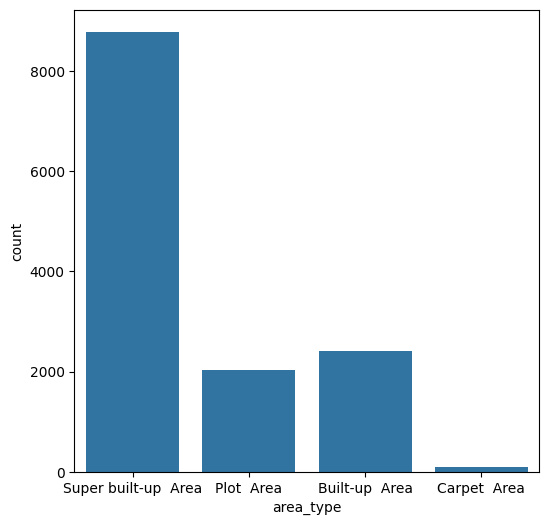

In [5]:
plt.figure(figsize=(6,6))
sns.countplot(x='area_type',data=df1)
plt.show()

In [6]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [7]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')

In [8]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df3=df2.dropna()
df3.isnull().sum()


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3['size'].value_counts()

size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

Size has discretley different values.So we will apply some function to get the numeric value----

In [12]:
df3.loc[:, 'bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [14]:
df3=df3.drop(['size'],axis ='columns')

In [15]:
df3

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [16]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
  try:
    float(x)
    return True
  except:
    return False


In [18]:
df3[~df3['total_sqft'].apply(is_float)].head()



,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2


In [19]:
def convert_sqft_to_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [20]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()
df4.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [21]:
df5=df4.copy()
df5['price_per_sqft']=df4['price']*100000/df4['total_sqft']
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [22]:
len(df5['location'].unique())

1304

In [23]:
df5.location = df5.location.apply(lambda x: x.strip()) #This removes whitespaces
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)#This groups the DataFrame by the 'location' column and then counts the occurrences for each unique location.
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [24]:
len(location_stats[location_stats<=10])

1052

In [25]:
location_stats_less_then_10 = (location_stats[location_stats<10])
location_stats_less_then_10

location
2nd Phase JP Nagar       9
Volagerekallahalli       9
Yemlur                   9
4th Block Koramangala    9
Lingarajapuram           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 1039, dtype: int64

In [26]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_then_10 else x)
len(df5.location.unique())

255

Removing Outliers


In [27]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [28]:
df6.shape

(12502, 6)

In [29]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [30]:
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [31]:


def remove_pps_outliers(df):
  df_out=pd.DataFrame()
  for key, subdf in df.groupby('location'):
      m = np.mean(subdf.price_per_sqft)
      st=np.std(subdf.price_per_sqft)
      reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
      df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df7=remove_pps_outliers(df6)


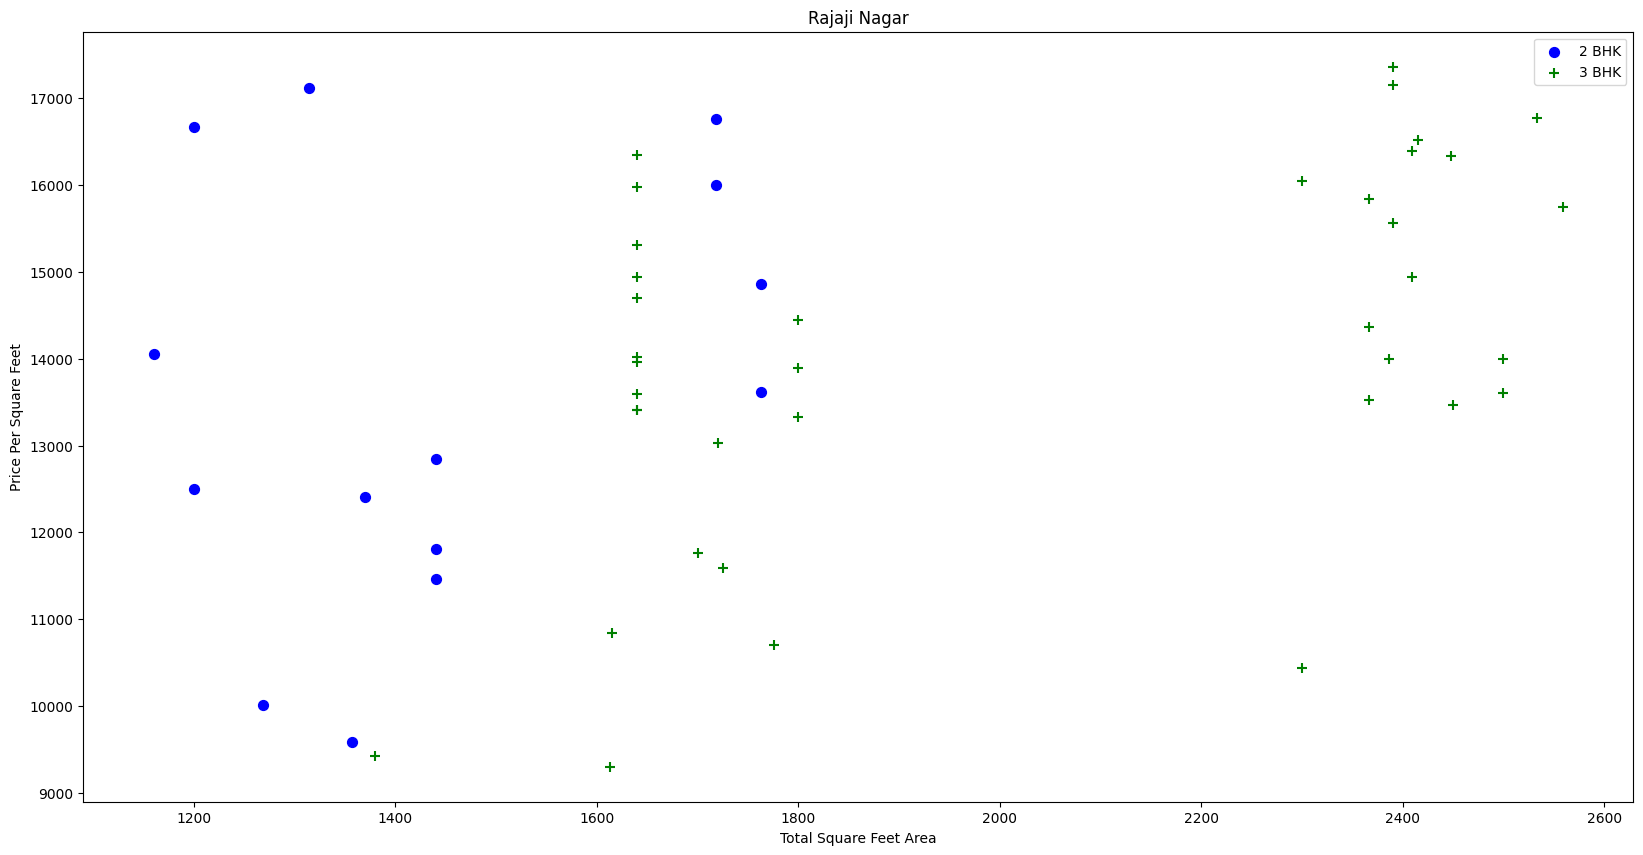

In [32]:

def plot_scatter_chart(df, location):

    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    

  
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color='blue', label='2 BHK', s=50)

   
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker='+', color='green', label='3 BHK', s=50)

   
    plt.xlabel("Total Square Feet Area")

    
    plt.ylabel("Price Per Square Feet")

   
    plt.title(location)

    
    plt.legend()


plot_scatter_chart(df7, "Rajaji Nagar")


plt.show()


In [33]:

def remove_bhk_outliers(df):
    exclude_indices = np.array([]) 
    for location, location_df in df.groupby('location'): 
        bhk_stats = {} 
        for bhk, bhk_df in location_df.groupby('bhk'): 

            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'): 
            if bhk > 1:    
                stats = bhk_stats.get(bhk - 1) 
                if stats and stats['count'] > 5: 
                    exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values) 

    return df.drop(exclude_indices, axis='index')


In [34]:
df8=remove_bhk_outliers(df7)
df8.shape

(7369, 6)

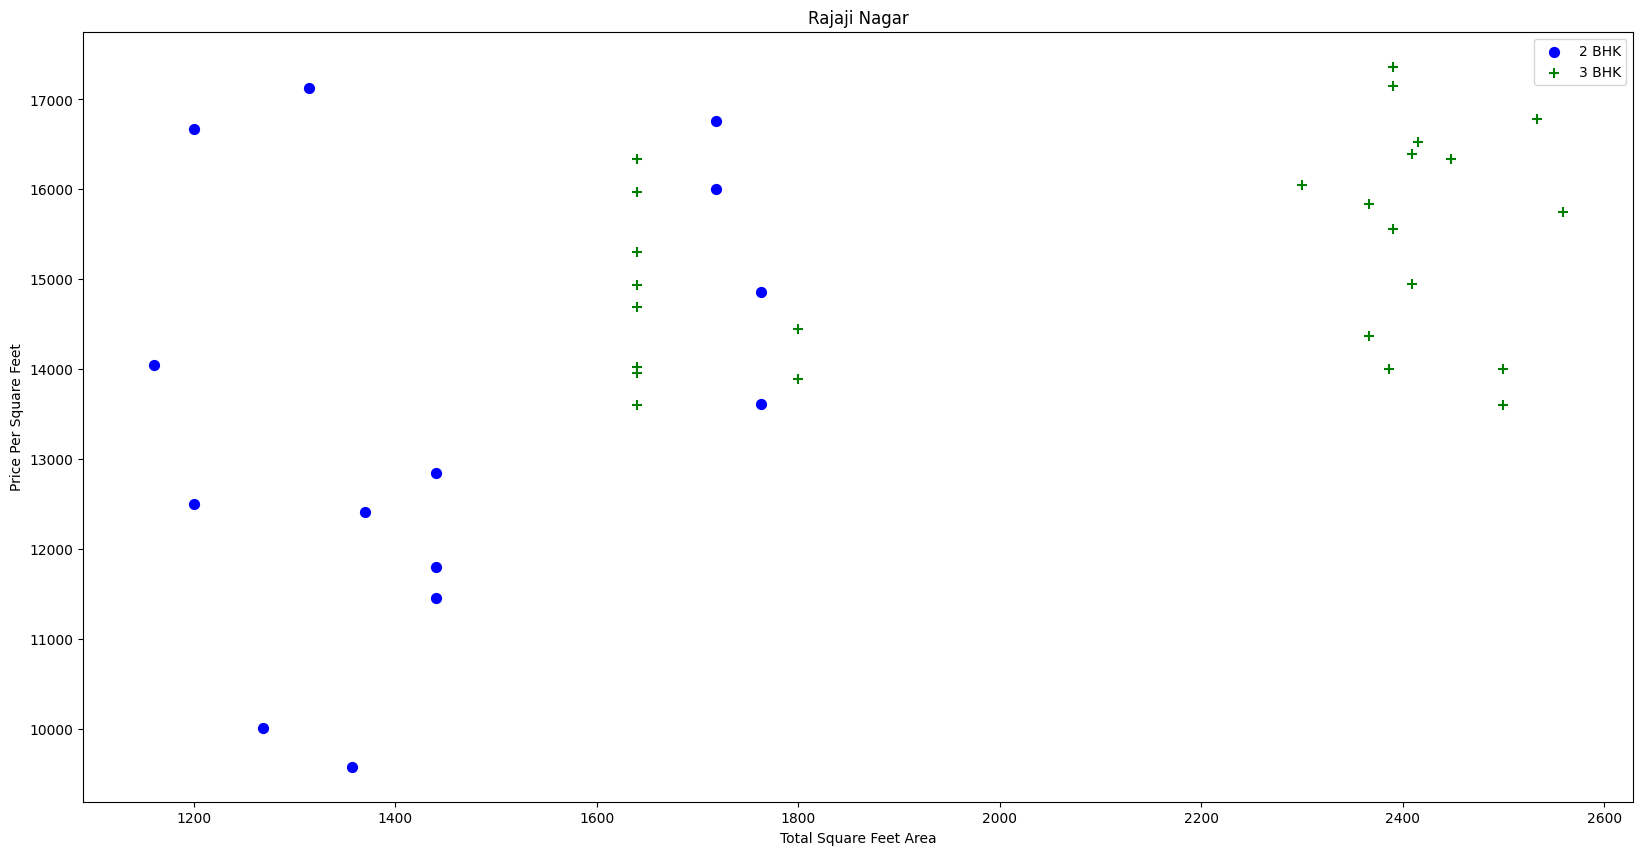

In [35]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

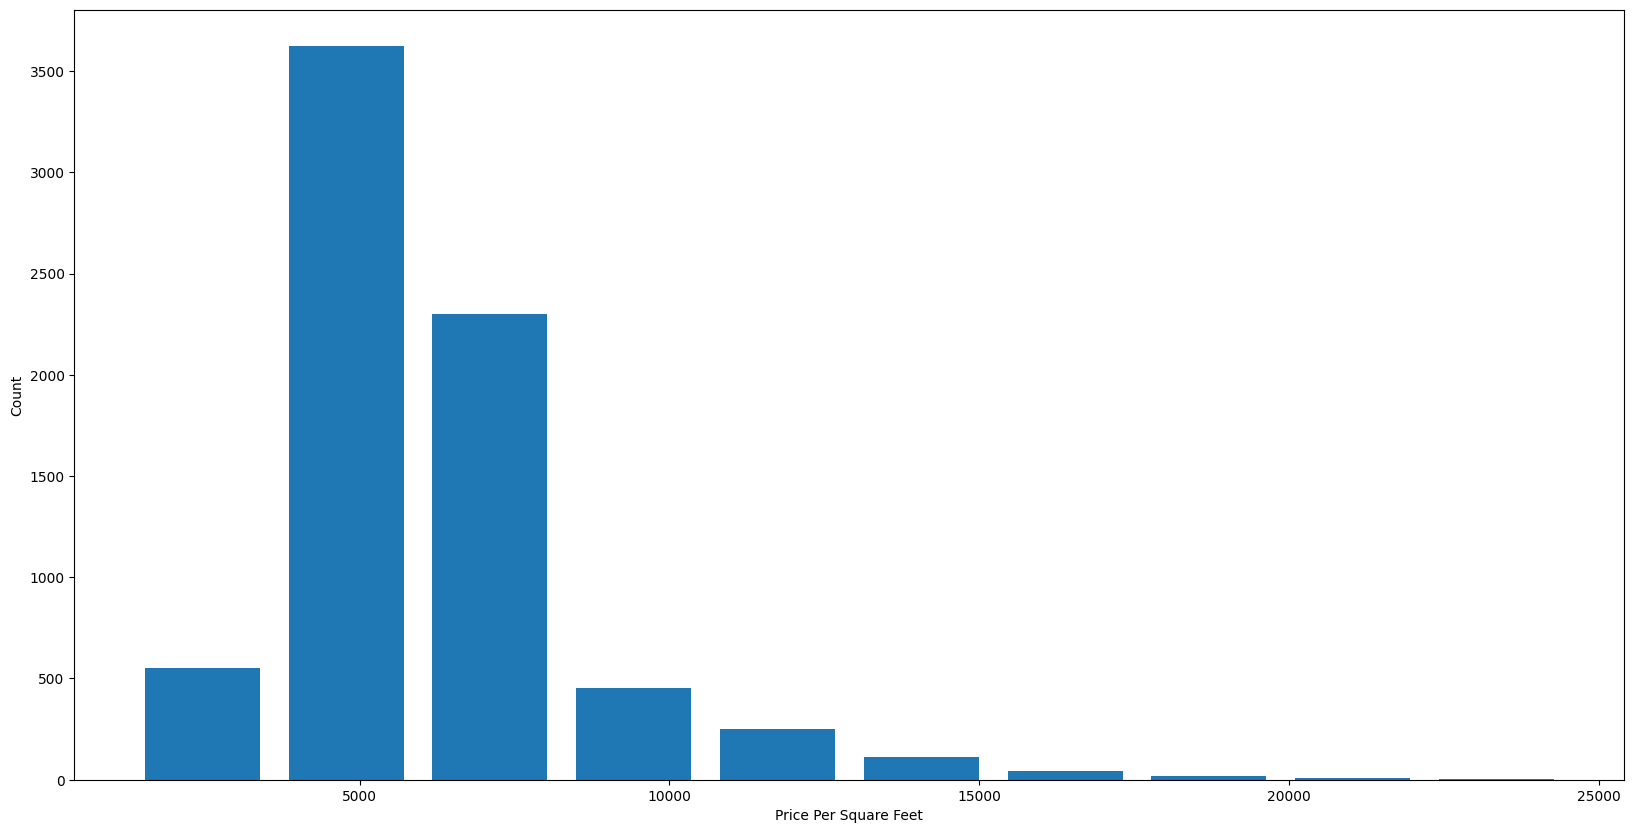

In [36]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


In [37]:
#Removing Bathrrom outliers
df8.bath.unique ()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [38]:
df8[df8.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
5344,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8547,other,12000.0,12.0,525.0,10,4375.000000
8633,other,10000.0,16.0,550.0,16,5500.000000
9329,other,6000.0,12.0,150.0,11,2500.000000
9642,other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

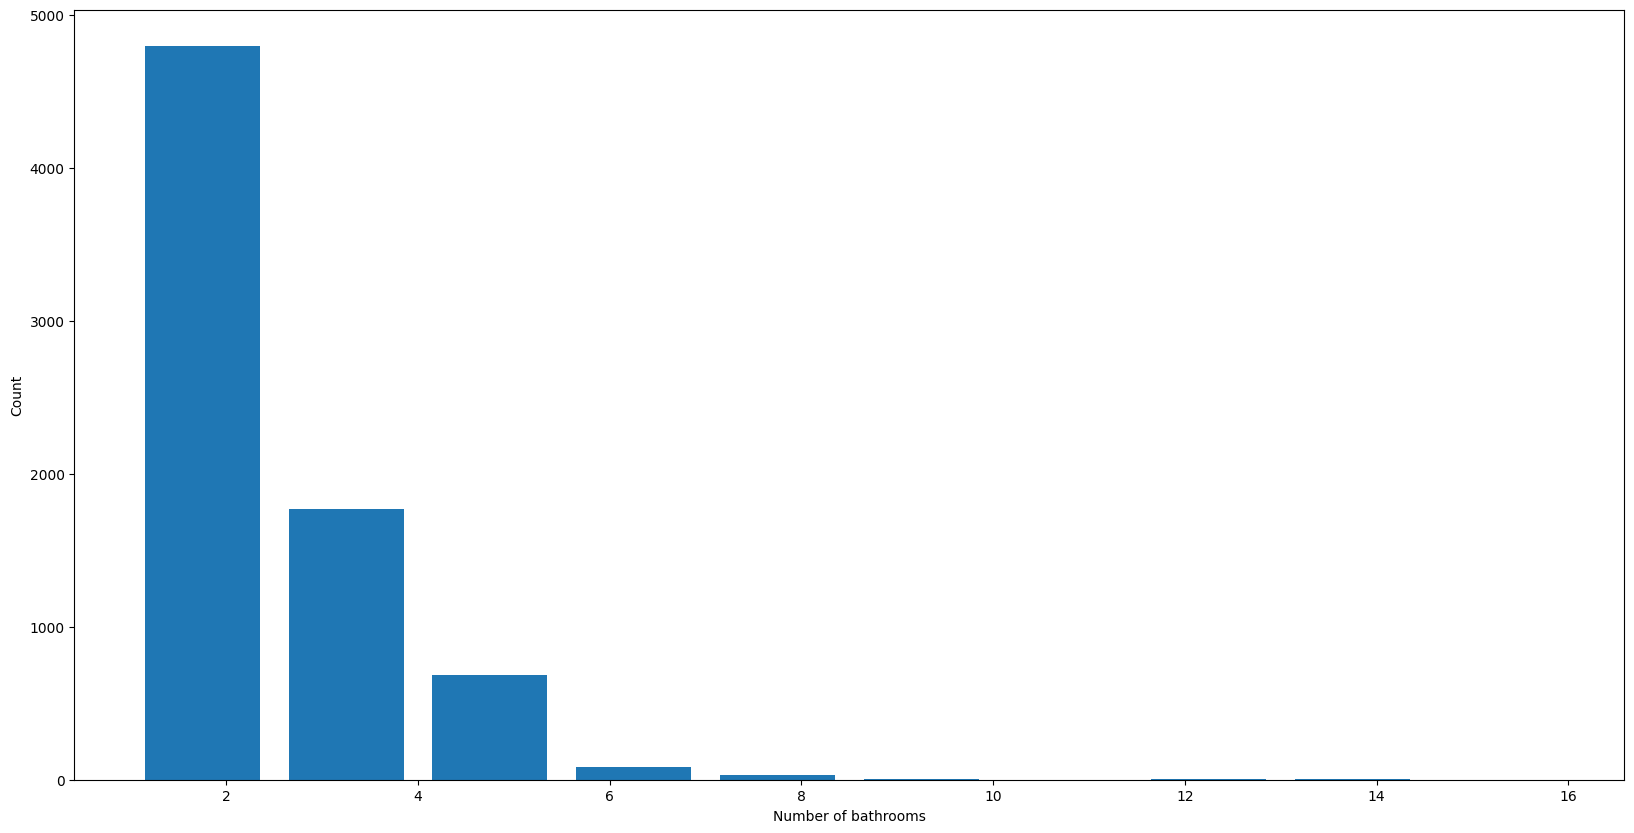

In [39]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [40]:
df8[(df8.bath>df8.bhk+2)]

,location,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
1642,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5305,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6792,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8476,other,11338.0,9.0,1000.0,6,8819.897689


In [41]:
df9=df8[~(df8.bath>df8.bhk+2)]

In [42]:
df10 = df9.drop(['price_per_sqft'], axis= 'columns')
df10.shape

(7364, 5)

In [43]:
dummies=pd.get_dummies(df10.location)

In [45]:
df11= pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
df12=df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
df12.shape

(7364, 258)

Building Model

In [48]:
X=df12.drop('price',axis='columns')
y=df12.price

In [49]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [52]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)



0.7841115472263515

In [53]:
lr_clf.score(X_train,y_train)

0.8708903408527506

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(), X , y , cv=cv)


array([0.81622005, 0.83667864, 0.84548404, 0.88293084, 0.9001836 ,
       0.80123013, 0.84121716, 0.80309898, 0.81975185, 0.85515325])

We will check the efficiency of model with different Estimators to chosse which one works best.

In [58]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pandas as pd
import time

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100],
                'max_depth': [None, 10, 20]
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [50, 100],
                'learning_rate': [0.05, 0.1],
                'max_depth': [3, 5]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        print(f"\n🔍 Running GridSearchCV for: {algo_name}...")
        start_time = time.time()
        
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)

        elapsed = time.time() - start_time
        print(f"✅ Done with {algo_name} in {elapsed:.2f} seconds")

        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    print("\n📊 Grid Search Summary:")
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Run it
find_best_model_using_gridsearchcv(X, y)



🔍 Running GridSearchCV for: linear_regression...
✅ Done with linear_regression in 1.22 seconds

🔍 Running GridSearchCV for: lasso...
✅ Done with lasso in 1.91 seconds

🔍 Running GridSearchCV for: decision_tree...
✅ Done with decision_tree in 4.55 seconds

🔍 Running GridSearchCV for: random_forest...
✅ Done with random_forest in 180.21 seconds

🔍 Running GridSearchCV for: xgboost...
✅ Done with xgboost in 26.27 seconds

📊 Grid Search Summary:


,model,best_score,best_params
0,linear_regression,0.856299,{}
1,lasso,0.699286,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.796801,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,random_forest,0.809033,"{'max_depth': None, 'n_estimators': 50}"
4,xgboost,0.776550,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."


Prediction

In [59]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)

In [60]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

6

In [63]:
def predict_price(location,sqft,bath,bhk):
  loc_index=np.where(X.columns==location[0][0])
  
  x=np.zeros(len(X.columns))
  x[0]=sqft
  x[1]=bath
  x[2]=bhk
  if len(loc_index) >=0:
      x[loc_index]=1


  return lr_clf.predict([x])[0]


In [64]:
predict_price('1st Phase JP Nagar',1000,3,3)

83.9881049136081

Creating Pickle File


In [65]:
 import pickle #This line imports the pickle module, which is a standard module in Python used for serializing and deserializing objects.
 with open('banglore_home-prices-model.pickle','wb') as f: #This line opens a file named 'banglore_home-prices-model.pickle' in binary write mode ('wb'). The with statement is used to ensure that the file is properly closed after writing.
      pickle.dump(lr_clf,f) #This line serializes the lr_clf (linear regression model) and writes it to the file. The dump function from the pickle module is used for this purpose.

In [66]:
import json
columns={
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
  f.write(json.dumps(columns))

In [67]:
from joblib import dump, load
dump(lr_clf, 'banglore_home_prices_model.joblib')

['banglore_home_prices_model.joblib']